Question 1

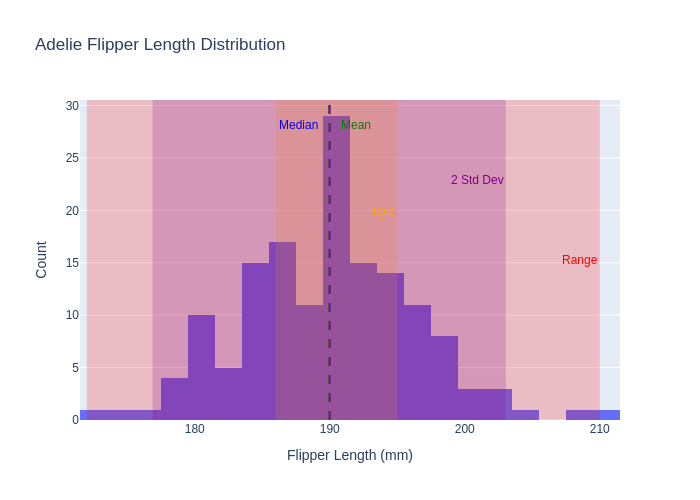

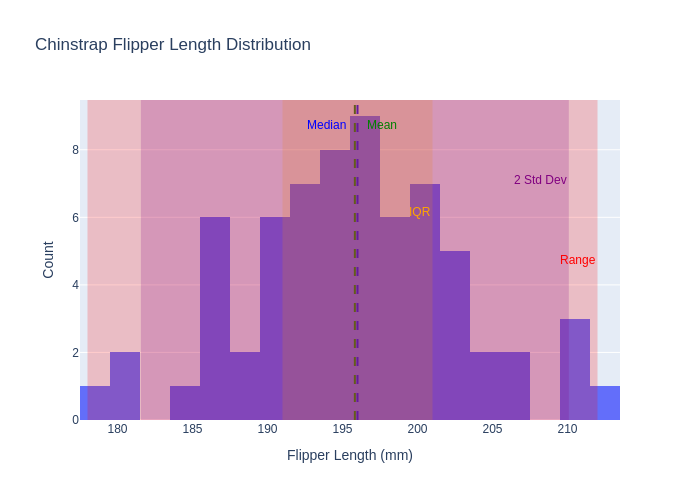

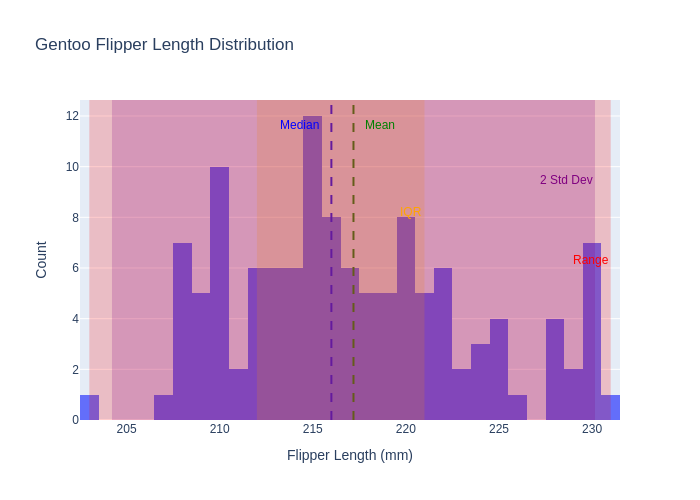

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Define a function to calculate key statistics and create the plot for each species
def plot_flipper_length_stats(species):
    df_species = penguins[penguins['species'] == species]
    flipper_length = df_species['flipper_length_mm'].dropna()
    
    # Calculate statistics
    mean = flipper_length.mean()
    median = flipper_length.median()
    min_val = flipper_length.min()
    max_val = flipper_length.max()
    q1 = flipper_length.quantile(0.25)
    q3 = flipper_length.quantile(0.75)
    std_dev = flipper_length.std()
    
    # Create histogram
    fig = px.histogram(df_species, x="flipper_length_mm", nbins=30, title=f"{species} Flipper Length Distribution")
    
    # Add vertical lines for mean and median with side annotations
    fig.add_vline(x=mean, line_width=2, line_dash="dash", line_color="green")
    fig.add_annotation(x=mean, y=0.95, text="Mean", showarrow=False, xanchor='left', yanchor='top',
                       xshift=10, font=dict(color="green"), yref="paper")
    
    fig.add_vline(x=median, line_width=2, line_dash="dash", line_color="blue")
    fig.add_annotation(x=median, y=0.95, text="Median", showarrow=False, xanchor='right', yanchor='top',
                       xshift=-10, font=dict(color="blue"), yref="paper")
    
    # Add vertical shaded regions for range, IQR, and two standard deviations
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="red", opacity=0.2, line_width=0)
    fig.add_annotation(x=max_val, y=0.5, text="Range", showarrow=False, xanchor='right', yanchor='middle',
                       font=dict(color="red"), yref="paper")
    
    fig.add_vrect(x0=q1, x1=q3, fillcolor="orange", opacity=0.2, line_width=0)
    fig.add_annotation(x=q3, y=0.65, text="IQR", showarrow=False, xanchor='right', yanchor='middle',
                       font=dict(color="orange"), yref="paper")
    
    fig.add_vrect(x0=mean - 2 * std_dev, x1=mean + 2 * std_dev, fillcolor="purple", opacity=0.2, line_width=0)
    fig.add_annotation(x=mean + 2 * std_dev, y=0.75, text="2 Std Dev", showarrow=False, xanchor='right', yanchor='middle',
                       font=dict(color="purple"), yref="paper")
    
    # Update layout
    fig.update_layout(xaxis_title="Flipper Length (mm)", yaxis_title="Count")
    
    return fig

# Plot for each species
species_list = penguins['species'].unique()
for species in species_list:
    fig = plot_flipper_length_stats(species)
    fig.show(renderer="png")


Question 2

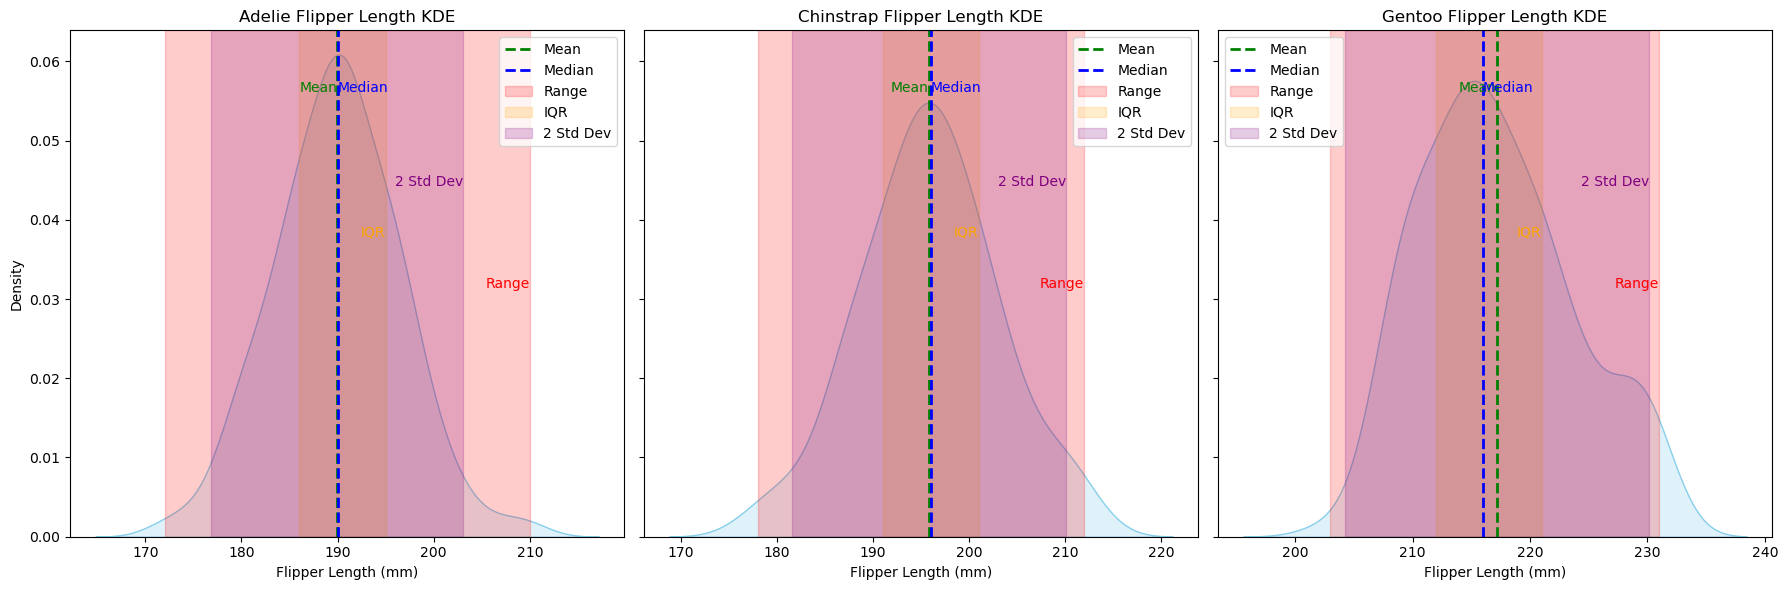

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Define a function to calculate key statistics and create the KDE plot for each species
def plot_flipper_length_kde(species, ax):
    df_species = penguins[penguins['species'] == species]
    flipper_length = df_species['flipper_length_mm'].dropna()
    
    # Calculate statistics
    mean = flipper_length.mean()
    median = flipper_length.median()
    min_val = flipper_length.min()
    max_val = flipper_length.max()
    q1 = flipper_length.quantile(0.25)
    q3 = flipper_length.quantile(0.75)
    std_dev = flipper_length.std()
    
    # Plot KDE
    sns.kdeplot(flipper_length, ax=ax, fill=True, color="skyblue")
    ax.set_title(f"{species} Flipper Length KDE")
    ax.set_xlabel("Flipper Length (mm)")
    
    # Add vertical lines for mean and median
    ax.axvline(mean, color="green", linestyle="--", lw=2, label="Mean")
    ax.axvline(median, color="blue", linestyle="--", lw=2, label="Median")
    
    # Add shaded regions for range, IQR, and 2 standard deviations
    ax.axvspan(min_val, max_val, color="red", alpha=0.2, label="Range")
    ax.axvspan(q1, q3, color="orange", alpha=0.2, label="IQR")
    ax.axvspan(mean - 2 * std_dev, mean + 2 * std_dev, color="purple", alpha=0.2, label="2 Std Dev")
    
    # Add side annotations
    ax.text(mean, ax.get_ylim()[1] * 0.9, 'Mean', color="green", ha='right', va='top', fontsize=10)
    ax.text(median, ax.get_ylim()[1] * 0.9, 'Median', color="blue", ha='left', va='top', fontsize=10)
    ax.text(max_val, ax.get_ylim()[1] * 0.5, 'Range', color="red", ha='right', va='center', fontsize=10)
    ax.text(q3, ax.get_ylim()[1] * 0.6, 'IQR', color="orange", ha='right', va='center', fontsize=10)
    ax.text(mean + 2 * std_dev, ax.get_ylim()[1] * 0.7, '2 Std Dev', color="purple", ha='right', va='center', fontsize=10)
    
    ax.legend()

# Create a 1x3 grid of plots
species_list = penguins['species'].dropna().unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for each species
for i, species in enumerate(species_list):
    plot_flipper_length_kde(species, axes[i])

plt.tight_layout()
plt.show()


Question 3

I perfer the KDE the most as I think it is more versatile than box plot or histograms. KDE provides a great visualization of the distrubution of the data and allows us to easily compare. The peaks of the KDE allows us to identity the modality of the data, as well as the curves shows whether the data has any skews. The estimation helps us to predict the data of the overall population, however the bandwidth may be affecting the KDE's accuracy, especially when the sample size is relatively small. 

In comparison, the histogram is similar to KDE as it also shows a visualization of the data. The visualization hugely rely on the bin size chosen. It can show many similar properties of the data compared to the KDE, but it can visualize the sample size through the height of each bin. Lastly, the box plot is different as it focuses on the calculated results of the data. The box plot provides things like the mean, interquartile range, and outliers of the data. Conversely, it does not show any trends and distrbution of the data. 


Chatgpt Session 1:

Link: https://chatgpt.com/share/66f3859a-5f00-800f-862a-f0d933fd104b

Summary: Here's a summary of our exchanges related to your analysis and understanding of visualizing distributions using the **penguins dataset**:

---

1. **Visualization Methods: Box Plots, Histograms, and Kernel Density Estimators (KDEs)**:
   - **Box Plots**:
     - Visualize data using the five-number summary (minimum, Q1, median, Q3, maximum).
     - Effective for detecting outliers and comparing central tendencies and spread between groups.
     - However, box plots do not directly indicate sample size or detailed distribution shapes, such as multimodality.
  
   - **Histograms**:
     - Show data distribution by grouping data into bins and counting the frequency of values.
     - Useful for detecting multimodal patterns and showing how data is distributed across ranges.
     - They provide information on sample size but can be sensitive to the choice of bin width, which affects the visual outcome.

   - **Kernel Density Estimator (KDE)**:
     - Provides a smooth curve that estimates the data’s underlying probability distribution.
     - KDE is particularly useful for showing trends and multimodality without relying on bins, but it can be misleading with small datasets or inappropriate bandwidth selection.

---

2. **Application of Visualization Techniques to the Penguins Dataset**:
   - You were working with the **flipper length** data for different penguin species and wanted to mark key statistics (mean, median, range, interquartile range, and standard deviation) on plots. 
   - First, we used **Plotly histograms** to represent the distributions and overlay vertical lines and shaded regions to show these statistics.
   - Then, we repeated this using **Seaborn KDE plots**, organized in a row of three plots, and added annotations for each statistic.

---

3. **Your Current Understanding**:
   - **Box Plots**: You noted that box plots summarize medians and quartiles but don't show sample size.
   - **Histograms**: Highlight that they account for sample size and show multimodality in distributions.
   - **KDE**: Show smooth predictions of population distribution but can oversmooth or undersmooth depending on the bandwidth.

---

4. **Pros and Cons of Box Plots, Histograms, and KDEs**:
   - **Box Plots**: Pros include compactness, outlier detection, and good for comparing groups, but lack detailed distribution information.
   - **Histograms**: Good for showing distribution shape and sample size, but sensitive to bin width and may appear jagged.
   - **KDEs**: Provide smooth and intuitive distribution estimates, but they don’t directly indicate sample size and are sensitive to bandwidth.

---

5. **Best Approach for the Penguins Dataset**:
   - **Histograms** or **KDEs** are better for exploring the **shape of the flipper length distribution** (multimodality, skewness, etc.).
   - **Box plots** are best for **comparing species** and summarizing central tendencies, spread, and outliers.
   - A combination of histograms/KDE with box plots can give a fuller view of the data.

---

This summary captures our key discussions and can be submitted as a record of your homework interactions. Let me know if you need further details!

Question 4

In [ ]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1. A and C has similar means and variances. As shown on their histograms, A and C's mean would both around 5, in the middle of the histogram. They also both have a huge spread away from the center, which A is equally distrubuted and C is bimodal on two sides of the x axis.
2. A and B has similar means but different variances. Their mean are both around 5, but A is equally spread from 0 to 10, and B shows that there are more sample beside 5.
3. B and D has similar variances but different means. They both have a high frequnency of data around their mean, however B is centered at 5 and the most frequnent appearing data of D is around 6.
4. C and D has different means and variances. An estimate of C's mean would be between 4 to 5, and D obvious has taller bins between 6 to 7. Their variances also differs a lot, since C is bimodal and D has a single peak.

Question 5

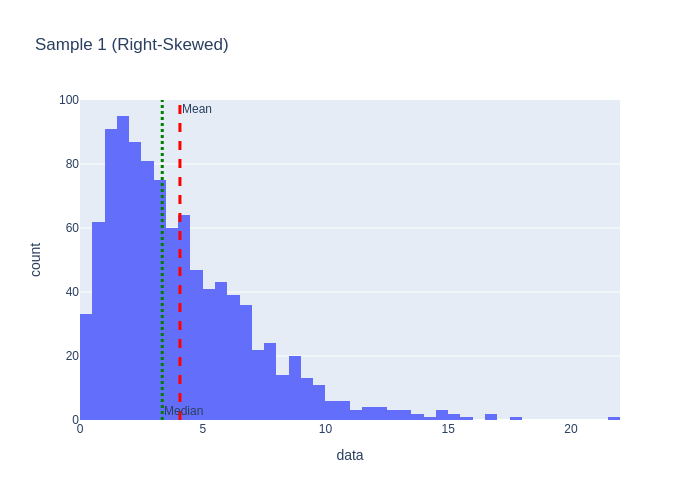

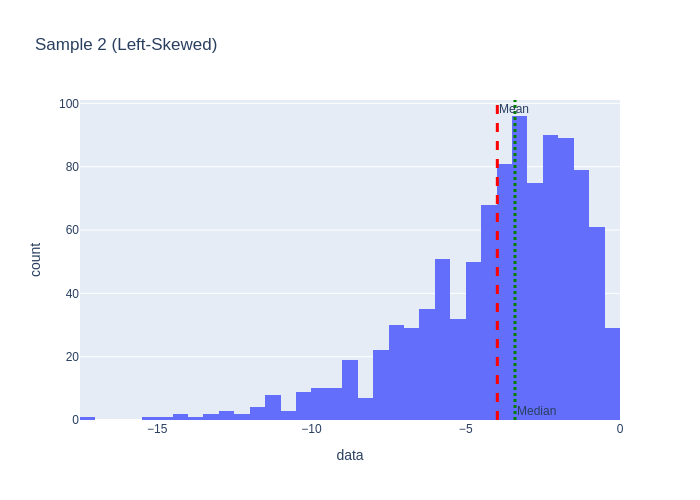

In [4]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

# Generate Sample 1 (Right-Skewed Gamma Distribution)
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Calculate mean and median for Sample 1
mean1 = sample1.mean()
median1 = np.quantile(sample1, 0.5)

# Create histogram for Sample 1
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", title='Sample 1 (Right-Skewed)')

# Add vertical lines for mean and median
fig1.add_vline(x=mean1, line_width=3, line_dash="dash", line_color="red", annotation_text="Mean", annotation_position="top right")
fig1.add_vline(x=median1, line_width=3, line_dash="dot", line_color="green", annotation_text="Median", annotation_position="bottom right")

# Show Sample 1 histogram with mean and median
fig1.show(renderer="png")

# Generate Sample 2 (Left-Skewed by negating Gamma Distribution)
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Calculate mean and median for Sample 2
mean2 = sample2.mean()
median2 = np.quantile(sample2, 0.5)

# Create histogram for Sample 2
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data", title='Sample 2 (Left-Skewed)')

# Add vertical lines for mean and median
fig2.add_vline(x=mean2, line_width=3, line_dash="dash", line_color="red", annotation_text="Mean", annotation_position="top right")
fig2.add_vline(x=median2, line_width=3, line_dash="dot", line_color="green", annotation_text="Median", annotation_position="bottom right")

# Show Sample 2 histogram with mean and median
fig2.show(renderer="png")


If the mean is smaller than or on the left side of the median, then there is a left skewness. Otherwise, the mean is larger than or on the right side of the median, and there is a right skewness. 

When there exist a few, but extremely small values, the mean will be drastically shrinked and lean toward the left side. However, there are more samples of values on the right, which leads the histogram's bins to be higher and the median to lean on the right. Thus a left skew is created which a few outliers extends the distrubution to the far left.

The vice versa happens when there are outliers that are extremely larger than the majority of the data, which the mean is pulled to the right compared to the median, and a right skew would be shown.

Chatgpt session 2

Link: https://chatgpt.com/share/66f39e66-1bd0-800f-bad8-67e9a5d247f7

Summary: Here’s a summary of our exchanges regarding your homework:

### Summary of Exchanges

1. **Mean, Median, and Skewness**:
   - You requested an explanation of the general relationship between the mean, median, and the concepts of right and left skewness. 
   - I explained that in a right-skewed distribution, the mean is greater than the median (Mean > Median), while in a left-skewed distribution, the mean is less than the median (Mean < Median). This occurs because the mean is sensitive to extreme values, whereas the median is not.

2. **Code Analysis**:
   - You provided a code snippet involving the generation of random samples from a Gamma distribution using SciPy, the creation of histograms with Plotly Express, and the calculation of the mean and median for the generated samples.
   - I broke down the code, explaining its purpose, including generating samples, plotting histograms, and calculating statistics.

3. **Visualizing Mean and Median**:
   - You asked how to show the mean and median in the histogram visualizations for the generated samples.
   - I provided an updated code snippet that adds vertical lines to the histograms to indicate the mean (in red, dashed) and the median (in green, dotted) for both Sample 1 (right-skewed) and Sample 2 (left-skewed). 

4. **Final Code**:
   - The final code includes the generation of both samples, the calculation of their mean and median, and the creation of histograms with the mean and median visually indicated.

Feel free to modify or expand on this summary as needed for your assignment! If you need any additional details or clarifications, just let me know.

Question 6

In [5]:
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-06-04/cheeses.csv'
cheeses = pd.read_csv(url)

# Print all column names in the dataset
print("Columns in the dataset:")
print(cheeses.columns.tolist())

# Display the first few rows of the dataset
print("First five rows of the dataset:")
print(cheeses.head())

Columns in the dataset:
['cheese', 'url', 'milk', 'country', 'region', 'family', 'type', 'fat_content', 'calcium_content', 'texture', 'rind', 'color', 'flavor', 'aroma', 'vegetarian', 'vegan', 'synonyms', 'alt_spellings', 'producers']
First five rows of the dataset:
              cheese                                        url   milk  \
0         Aarewasser         https://www.cheese.com/aarewasser/    cow   
1   Abbaye de Belloc   https://www.cheese.com/abbaye-de-belloc/  sheep   
2   Abbaye de Belval   https://www.cheese.com/abbaye-de-belval/    cow   
3  Abbaye de Citeaux  https://www.cheese.com/abbaye-de-citeaux/    cow   
4    Abbaye de Tamié              https://www.cheese.com/tamie/    cow   

       country       region family                        type fat_content  \
0  Switzerland          NaN    NaN                   semi-soft         NaN   
1       France  Pays Basque    NaN          semi-hard, artisan         NaN   
2       France          NaN    NaN                   s

In [6]:
# Count unique values in categorical columns (assuming 'type' and 'country' exist)
print("\nCheese Types Distribution:")
print(cheeses['type'].value_counts())

print("\nCheese Countries Distribution:")
print(cheeses['country'].value_counts())

print("\nCheese Falvor Distribution:")
print(cheeses['flavor'].value_counts())


Cheese Types Distribution:
type
semi-hard, artisan               133
hard, artisan                    121
semi-soft, artisan               117
soft, artisan                     99
soft                              90
                                ... 
soft, artisan, brined              1
soft, semi-soft, soft-ripened      1
hard, artisan, brined              1
fresh firm, soft-ripened           1
semi-hard, brined                  1
Name: count, Length: 84, dtype: int64

Cheese Countries Distribution:
country
United States                 305
France                        169
Italy                         141
Canada                         65
Australia                      53
                             ... 
Lebanon, Middle East            1
France, Switzerland             1
Netherlands, United States      1
Australia, France               1
Romania                         1
Name: count, Length: 82, dtype: int64

Cheese Falvor Distribution:
flavor
creamy                            

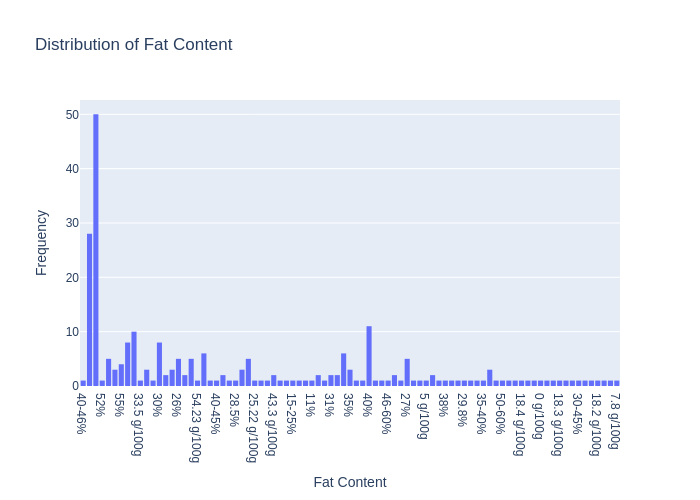

In [7]:
import plotly.express as px
import plotly.graph_objects as g

# --- Visualizations ---

# 1. Histogram for fat content distribution
fig1 = px.histogram(cheeses, x='fat_content', nbins=20, title='Distribution of Fat Content')
fig1.update_layout(xaxis_title='Fat Content', yaxis_title='Frequency')
fig1.show(renderer="png")


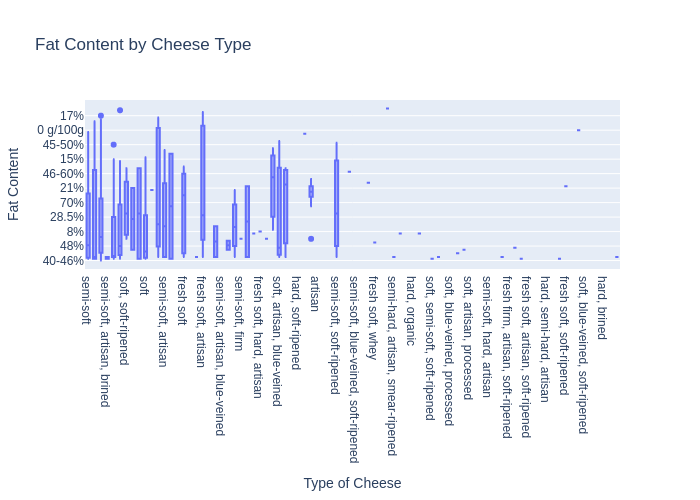

In [8]:
# 2. Boxplot of fat content by cheese type
fig2 = px.box(cheeses, x='type', y='fat_content', title='Fat Content by Cheese Type')
fig2.update_layout(xaxis_title='Type of Cheese', yaxis_title='Fat Content')
fig2.show(renderer="png")


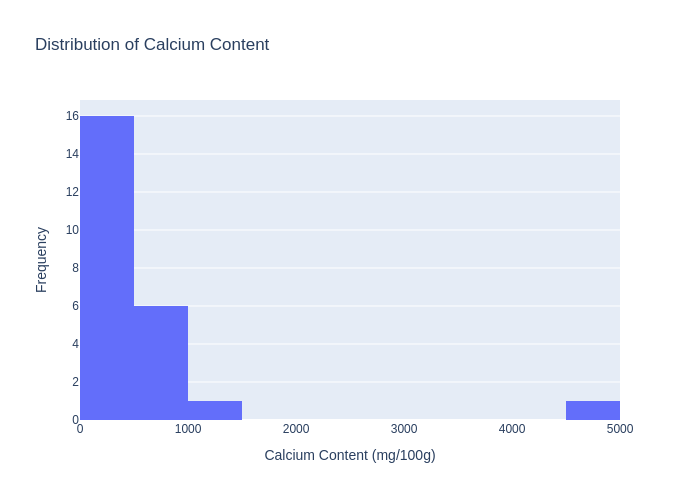

In [9]:
import pandas as pd
import plotly.express as px

# Load the dataset
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-06-04/cheeses.csv'
cheeses = pd.read_csv(url)

# Clean the calcium_content columns
cheeses['calcium_content'] = cheeses['calcium_content'].str.replace(' mg/100g', '').astype(float, errors='ignore')

# Drop rows with NaN values in relevant columns
cleaned_cheeses = cheeses.dropna(subset=['fat_content', 'calcium_content'])

# 2. Histogram for Calcium Content
fig_hist_calcium = px.histogram(cleaned_cheeses, x='calcium_content', nbins=20, title='Distribution of Calcium Content')
fig_hist_calcium.update_layout(xaxis_title='Calcium Content (mg/100g)', yaxis_title='Frequency')
fig_hist_calcium.show(renderer="png")



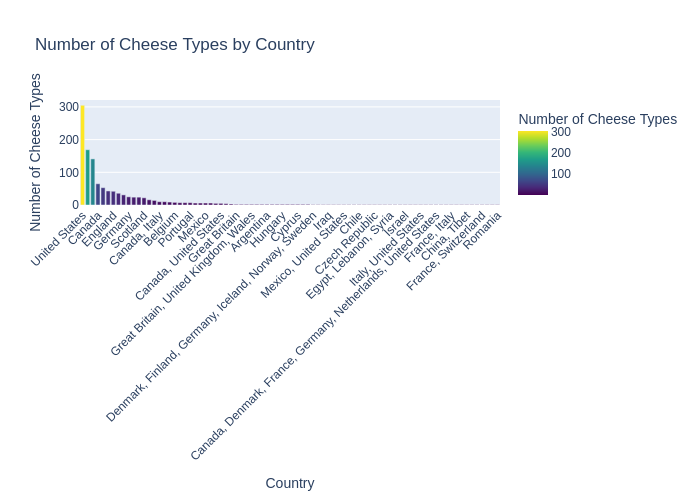

In [10]:
# Count the number of cheeses by country
country_counts = cheeses['country'].value_counts().reset_index()
country_counts.columns = ['country', 'cheese_count']

# Creating the bar plot
fig4 = px.bar(country_counts, 
             x='country', 
             y='cheese_count', 
             title='Number of Cheese Types by Country',
             labels={'country': 'Country', 'cheese_count': 'Number of Cheese Types'},
             color='cheese_count',
             color_continuous_scale='Viridis')

# Update layout for better visibility
fig4.update_layout(xaxis_title='Country', 
                  yaxis_title='Number of Cheese Types',
                  xaxis_tickangle=-45)

# Show the plot
fig4.show(renderer = "png")


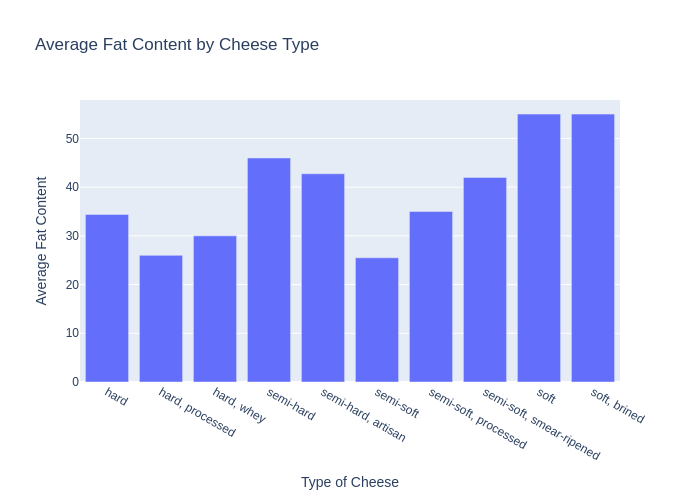

In [11]:
import pandas as pd
import plotly.express as px
import numpy as np

# Load the dataset
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-06-04/cheeses.csv'
cheeses = pd.read_csv(url)

# Function to convert fat content to a float value
def convert_fat_content(value):
    if isinstance(value, str):
        value = value.replace('%', '').strip()  # Remove '%' and whitespace
        if '-' in value:
            # Handle range by taking the average
            low, high = map(float, value.split('-'))
            return (low + high) / 2
        else:
            try:
                return float(value)  # Attempt to convert to float
            except ValueError:
                return np.nan  # Return NaN if conversion fails
    return np.nan  # Return NaN if not a string

# Clean fat_content and calcium_content columns
cheeses['fat_content'] = cheeses['fat_content'].apply(convert_fat_content)
cheeses['calcium_content'] = cheeses['calcium_content'].str.replace(' mg/100g', '').astype(float)

# Convert 'fat_content' to numeric, forcing errors to NaN
cheeses['fat_content'] = pd.to_numeric(cheeses['fat_content'], errors='coerce')

# Drop rows with NaN values in relevant columns
cleaned_cheeses = cheeses.dropna(subset=['fat_content', 'calcium_content'])

# 5. Bar plot of average fat content by cheese type
cheese_type_avg = cleaned_cheeses.groupby('type')['fat_content'].mean().reset_index()
fig5 = px.bar(cheese_type_avg, x='type', y='fat_content', title='Average Fat Content by Cheese Type')
fig5.update_layout(xaxis_title='Type of Cheese', yaxis_title='Average Fat Content')
fig5.show(renderer='png')


Chatgpt session 3

Link:https://chatgpt.com/share/66f3a7db-2254-800f-8b8d-5d75842fdf6e

Summary: Here's a summary of our exchanges:

1. **Cheese Dataset Analysis**:
   - We discussed analyzing the cheeses dataset, specifically focusing on fat and calcium content, but you later specified that you didn't want to analyze those aspects.

2. **Data Cleaning**:
   - You encountered errors while trying to clean the `fat_content` and `calcium_content` columns. We worked on functions to convert ranges in fat content and strip unnecessary characters from calcium content to prepare the data for analysis.

3. **Visualizations**:
   - We created visualizations including a bar plot to show the average fat content by cheese type. However, you faced errors related to data types, indicating that the `fat_content` values may not have been numeric.
   - I provided assistance on how to handle these errors, ensuring the data was in a proper numeric format for calculations.

4. **Exploration of Interesting Insights**:
   - You expressed interest in exploring interesting aspects of the dataset, particularly looking at distributions related to cheese types.

5. **KDE Visualizations**:
   - We discussed using Kernel Density Estimation (KDE) plots to visualize distributions. You requested to focus on cheese counts by country rather than fat or calcium content.

6. **Plotly Visualization**:
   - Finally, I provided a code snippet to create a bar plot using Plotly, showing the number of cheese types produced by each country, allowing for an interactive visualization of the data.

If you need any specific details added or changes made to this summary, just let me know!

Question 7

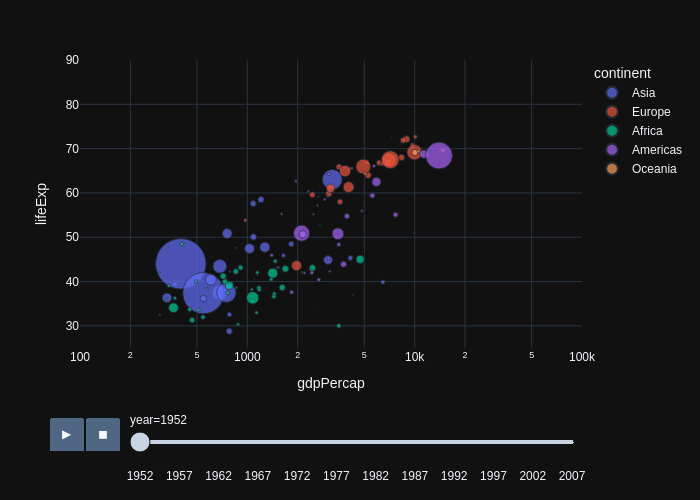

In [12]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90], template = "plotly_dark")
fig.show(renderer="png")

Question 8

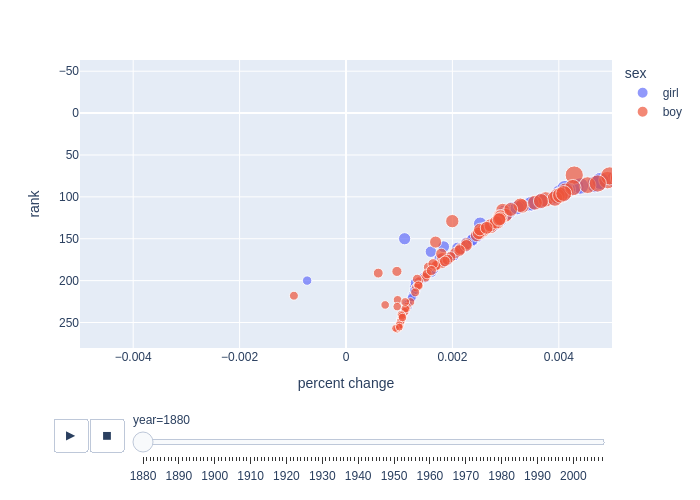

In [13]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Question 9

Yes? I think I reviewed, but I bet I will still need to review a lot when midterm comes.